In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
from tqdm import tqdm
import umap
import seaborn as sns
from IPython.display import display
import os

c:\Users\1645286\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('/bigdata/data/6/penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 5)

In [4]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [5]:
df[df.isna().any(axis=1)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN
339,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.sex.value_counts()

MALE      169
FEMALE    165
.           1
Name: sex, dtype: int64

In [8]:
df.loc[df.sex == '.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [9]:
df = df.drop(index=[336], axis=0).reset_index(drop=True)
df.sex.value_counts()

MALE      169
FEMALE    165
Name: sex, dtype: int64

In [10]:
df['sex_MALE'] = df['sex'].apply(lambda x: 1 if x == 'MALE' else 0)
df['sex_FEMALE'] = df['sex'].apply(lambda x: 1 if x == 'FEMALE' else 0)
df.drop(columns=['sex'], inplace=True)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,sex_FEMALE
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,1
2,40.3,18.0,195.0,3250.0,0,1
3,36.7,19.3,193.0,3450.0,0,1
4,39.3,20.6,190.0,3650.0,1,0


In [11]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,sex_FEMALE
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,43.986826,17.173952,214.347305,4207.185629,0.505988,0.494012
std,5.461540,1.973277,263.648447,804.009294,0.500714,0.500714
min,32.100000,13.100000,-132.000000,2700.000000,0.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000,0.000000
75%,48.575000,18.700000,213.000000,4768.750000,1.000000,1.000000
max,59.600000,21.500000,5000.000000,6300.000000,1.000000,1.000000


In [12]:
scaler = StandardScaler()
scaled_df = df.copy()
scaled_df[df.columns] = scaler.fit_transform(df[df.columns])

In [13]:
models, scores_cost, scores_silhouette = [], [], []
rs = 2023
for i in tqdm(range(2, 10)):
    model = KMeans(n_clusters=i, random_state=rs, init='k-means++').fit(scaled_df)
    models.append(model)
    scores_cost.append(model.inertia_)
    scores_silhouette.append(silhouette_score(scaled_df, model.labels_))
    

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 13.76it/s]


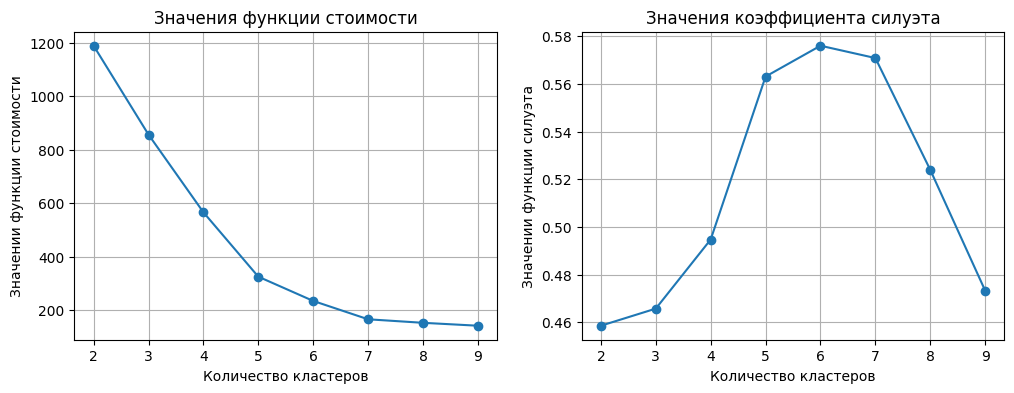

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(np.arange(2, 10), scores_cost, marker='o')
axes[0].set_title("Значения функции стоимости")
axes[0].set_xlabel("Количество кластеров")
axes[0].set_ylabel("Значении функции стоимости")
axes[1].plot(np.arange(2, 10), scores_silhouette, marker='o')
axes[1].set_title("Значения коэффициента силуэта")
axes[1].set_xlabel("Количество кластеров")
axes[1].set_ylabel("Значении функции силуэта")
axes[0].grid()
axes[1].grid()
plt.show()

Самое высокое значение коэффициента силуэта - при 6 кластерах.

In [15]:
model_k6 = models[4]
df['Clusters_KMeans_6'] = model_k6.labels_
df.Clusters_KMeans_6.value_counts()

1    106
0     70
3     61
2     59
5     37
4      1
Name: Clusters_KMeans_6, dtype: int64

In [16]:
model_aggl6 = AgglomerativeClustering(6, compute_distances=True).fit(scaled_df)

df['Clusters_AgglomerativeClustering_6'] = model_aggl6.labels_

In [17]:
model_db = DBSCAN(eps=0.7, min_samples=10, n_jobs=-1).fit(scaled_df) #0.68 10
df['Clusters_DBSCAN'] = model_db.labels_

In [18]:
umap1 = umap.UMAP(n_neighbors=7, min_dist=0.8)

embeddings = umap1.fit_transform(scaled_df)

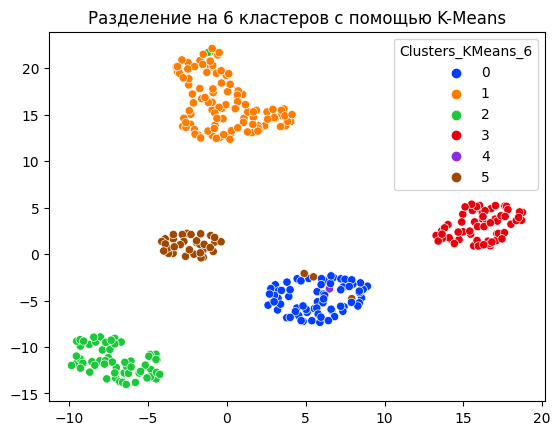

In [19]:
k = sns.scatterplot(
    x=embeddings[:, 0],
    y=embeddings[:, 1],
    hue=df['Clusters_KMeans_6'],
    palette='bright',
    legend=True
)
k.set_title('Разделение на 6 кластеров с помощью K-Means')
plt.show()

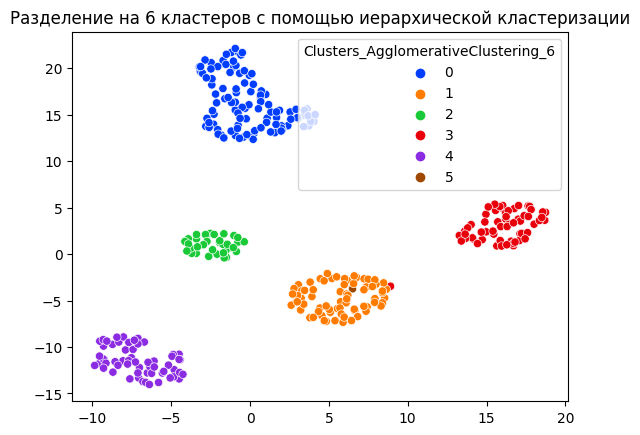

In [20]:
a = sns.scatterplot(
    x=embeddings[:, 0],
    y=embeddings[:, 1],
    hue=df['Clusters_AgglomerativeClustering_6'],
    palette='bright',
    legend=True
)
a.set_title('Разделение на 6 кластеров с помощью иерархической кластеризации')
plt.show()

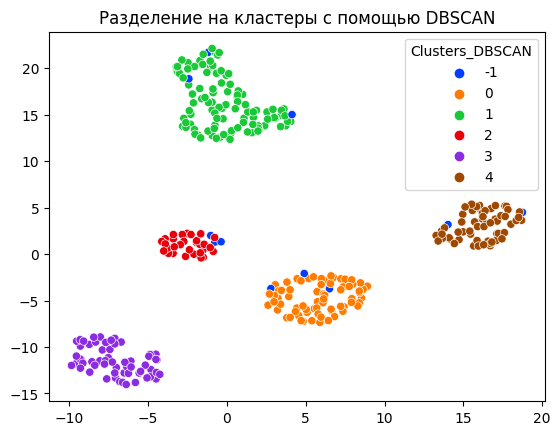

In [21]:
d = sns.scatterplot(
    x=embeddings[:, 0],
    y=embeddings[:, 1],
    hue=df['Clusters_DBSCAN'],
    palette='bright',
    legend=True
)
d.set_title('Разделение на кластеры с помощью DBSCAN')
plt.show()